In [1]:
# Importacion de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


%matplotlib inline

plt.style.use('default') # para graficos matplotlib
plt.rcParams['figure.figsize'] = (5, 5)

sns.set(style="whitegrid") # grid seaborn

# pd.options.display.float_format = '{:20,.0f}'.format # notacion output

# Acceso a set de datos

In [2]:
path = "data/"
df_props_full = pd.read_csv(path + "train.csv")
df_test = pd.read_csv(path + "test.csv")

# Conversión de tipos

In [3]:
df_props_full['fecha'] = pd.to_datetime(df_props_full['fecha'])
df_test['fecha'] = pd.to_datetime(df_test['fecha'])

In [4]:
# Convierto todos los valores 1/0 a uint8
df_props_full['gimnasio'] = df_props_full['gimnasio'].astype('uint8')
df_props_full['usosmultiples'] = df_props_full['usosmultiples'].astype('uint8')
df_props_full['piscina'] = df_props_full['piscina'].astype('uint8')
df_props_full['escuelascercanas'] = df_props_full['escuelascercanas'].astype('uint8')
df_props_full['centroscomercialescercanos'] = df_props_full['centroscomercialescercanos'].astype('uint8')

df_test['gimnasio'] = df_test['gimnasio'].astype('uint8')
df_test['usosmultiples'] = df_test['usosmultiples'].astype('uint8')
df_test['piscina'] = df_test['piscina'].astype('uint8')
df_test['escuelascercanas'] = df_test['escuelascercanas'].astype('uint8')
df_test['centroscomercialescercanos'] = df_test['centroscomercialescercanos'].astype('uint8')

In [5]:
# Convierto los representables en uint8. Utilizo el tipo de pandas UInt8Dtype para evitar conflicto con NaN
df_props_full['antiguedad'] = df_props_full['antiguedad'].astype(pd.UInt8Dtype())
df_props_full['habitaciones'] = df_props_full['habitaciones'].astype(pd.UInt8Dtype())
df_props_full['garages'] = df_props_full['garages'].astype(pd.UInt8Dtype())
df_props_full['banos'] = df_props_full['banos'].astype(pd.UInt8Dtype())

df_test['antiguedad'] = df_test['antiguedad'].astype(pd.UInt8Dtype())
df_test['habitaciones'] = df_test['habitaciones'].astype(pd.UInt8Dtype())
df_test['garages'] = df_test['garages'].astype(pd.UInt8Dtype())
df_test['banos'] = df_test['banos'].astype(pd.UInt8Dtype())

In [6]:
# Convierto los representables en uint16. Utilizo el tipo de pandas UInt16Dtype para evitar conflicto con NaN
df_props_full['metroscubiertos'] = df_props_full['metroscubiertos'].astype(pd.UInt16Dtype())
df_props_full['metrostotales'] = df_props_full['metrostotales'].astype(pd.UInt16Dtype())

df_test['metroscubiertos'] = df_test['metroscubiertos'].astype(pd.UInt16Dtype())
df_test['metrostotales'] = df_test['metrostotales'].astype(pd.UInt16Dtype())

In [7]:
# Convierto los representables en uint32. Utilizo el tipo de pandas UInt32Dtype para evitar conflicto con NaN
df_props_full['id'] = df_props_full['id'].astype(pd.UInt32Dtype())
df_props_full['idzona'] = df_props_full['idzona'].astype(pd.UInt32Dtype())
# df_props_full['Precio_MEX'] = df_props_full['Precio_MEX'].astype(pd.UInt32Dtype())
# df_props_full['Precio_USD'] = df_props_full['Precio_USD'].astype(pd.UInt32Dtype())
df_props_full['precio'] = df_props_full['precio'].astype('float32')

df_test['id'] = df_test['id'].astype(pd.UInt32Dtype())
df_test['idzona'] = df_test['idzona'].astype(pd.UInt32Dtype())

In [8]:
features = df_props_full
len(features)

240000

In [9]:
features.corr()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,1.000000,0.002696,-0.002220,-0.001893,-0.001941,0.000280,0.001804,0.003623,-0.000239,0.001511,0.000696,-0.000257,-0.001543,-0.004014,-0.002146,-0.000889
antiguedad,0.002696,1.000000,0.159373,-0.078656,-0.063351,0.077990,0.044821,0.030616,-0.101883,0.008250,-0.106388,-0.095266,-0.136524,-0.005126,-0.009686,0.073097
habitaciones,-0.002220,0.159373,1.000000,0.243112,0.489695,0.517499,0.367938,-0.047764,-0.007486,0.007764,-0.030025,-0.005873,-0.012056,0.018928,0.000925,0.251014
garages,-0.001893,-0.078656,0.243112,1.000000,0.435112,0.379190,0.235931,-0.018294,0.005892,-0.000294,0.122430,0.131324,0.117440,0.084461,0.075237,0.348543
banos,-0.001941,-0.063351,0.489695,0.435112,1.000000,0.683101,0.543252,-0.002771,-0.054064,0.060019,0.083278,0.097835,0.127115,-0.021811,-0.027297,0.534060
metroscubiertos,0.000280,0.077990,0.517499,0.379190,0.683101,1.000000,0.734490,-0.047889,-0.018422,0.046043,0.032568,0.045425,0.062742,-0.026743,-0.046432,0.629187
metrostotales,0.001804,0.044821,0.367938,0.235931,0.543252,0.734490,1.000000,-0.032124,0.014757,0.044079,0.021484,0.023762,0.068299,-0.050645,-0.072560,0.514411
idzona,0.003623,0.030616,-0.047764,-0.018294,-0.002771,-0.047889,-0.032124,1.000000,-0.057904,0.102763,0.005315,0.001869,0.030414,0.014544,0.030030,0.073644
lat,-0.000239,-0.101883,-0.007486,0.005892,-0.054064,-0.018422,0.014757,-0.057904,1.000000,-0.481296,-0.039118,-0.062442,-0.061804,-0.066013,-0.083778,-0.157514
lng,0.001511,0.008250,0.007764,-0.000294,0.060019,0.046043,0.044079,0.102763,-0.481296,1.000000,0.004241,-0.005106,0.024837,-0.038965,-0.047305,0.052578


# Dropna Tipo de propiedad

In [10]:
features.tipodepropiedad.isna().value_counts()

False    239954
True         46
Name: tipodepropiedad, dtype: int64

In [11]:
# Drop de datos sin tipo
features = features.dropna(subset=['tipodepropiedad'])
features = features.reset_index(drop=True)

len(features)

239954

# Metros

In [12]:
print('Metrocubiertos con datos nulos: ', features.metroscubiertos.isna().sum())
print('Metrocubiertos con datos nulos: ', features.metrostotales.isna().sum())
print('Publicaciones sin metros cubiertos y totales: ', len(features.loc[(features.metroscubiertos.isna() & features.metrostotales.isna()),:]))
print('Publicaciones con metroscubiertos==metrostotales: ', len(features.loc[features.metroscubiertos == features.metrostotales, :]))
print('Publicaciones con metroscubiertos>metrostotales (Error): ', len(features.loc[features.metroscubiertos > features.metrostotales, ['metroscubiertos','metrostotales']]))

Metrocubiertos con datos nulos:  17386
Metrocubiertos con datos nulos:  51458
Publicaciones sin metros cubiertos y totales:  0
Publicaciones con metroscubiertos==metrostotales:  37883
Publicaciones con metroscubiertos>metrostotales (Error):  70285


Swapeo columnas metroscubiertos-metrostotales en el caso que la primera es mayor a la segunda

In [13]:
cond = features.metroscubiertos > features.metrostotales
features.loc[cond, ['metroscubiertos', 'metrostotales']] = features.loc[cond, ['metrostotales', 'metroscubiertos']].values

In [14]:
print('Publicaciones con metroscubiertos>metrostotales (Error): ', len(features.loc[features.metroscubiertos > features.metrostotales, ['metroscubiertos','metrostotales']]))

Publicaciones con metroscubiertos>metrostotales (Error):  0


In [15]:
features['tot-cub'] = features.metrostotales - features.metroscubiertos

In [16]:
# Calculo diferencia promedio entre metrostotales y metroscubiertos por cada tipo de propiedad
meanDifByType = features.groupby('tipodepropiedad').agg({'tot-cub':'mean'}).fillna(0).T.round(0).astype(np.uint16)
meanDifByType

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Casa uso de suelo,Departamento Compartido,Duplex,Edificio,Garage,Hospedaje,...,Lote,Nave industrial,Oficina comercial,Otros,Quinta Vacacional,Rancho,Terreno,Terreno comercial,Terreno industrial,Villa
tot-cub,7,58,52,46,83,17,23,121,0,0,...,0,43,34,32,94,20,46,95,124,58


In [17]:
# Calculo diferencia media entre metrostotales y metroscubiertos por cada tipo de propiedad
medianDifByType = features.groupby('tipodepropiedad').agg({'tot-cub':'median'}).fillna(0).T.round(0).astype(np.uint16)
medianDifByType

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Casa uso de suelo,Departamento Compartido,Duplex,Edificio,Garage,Hospedaje,...,Lote,Nave industrial,Oficina comercial,Otros,Quinta Vacacional,Rancho,Terreno,Terreno comercial,Terreno industrial,Villa
tot-cub,0,28,38,31,70,0,8,120,0,0,...,0,3,0,0,66,0,0,72,124,38


In [18]:
def getMetrosCubiertos(row):
    if (np.isnan(row.metroscubiertos)):
        return (row.metrostotales - (medianDifByType.loc['tot-cub',row.tipodepropiedad])).astype(np.uint16)
    return row.metroscubiertos

In [19]:
def getMetrosTotales(row):
    if (np.isnan(row.metrostotales)):
        return (row.metroscubiertos + medianDifByType.loc['tot-cub',row.tipodepropiedad]).astype(np.uint16)
    return row.metrostotales

In [20]:
features['metroscubiertos'] = features.apply(lambda row: getMetrosCubiertos(row), axis=1)
features['metrostotales'] = features.apply(lambda row: getMetrosTotales(row), axis=1)

In [21]:
print('Metrocubiertos con datos nulos: ', features.metroscubiertos.isna().sum())
print('Metrostotales con datos nulos: ', features.metrostotales.isna().sum())

Metrocubiertos con datos nulos:  0
Metrostotales con datos nulos:  0


### Set Test

In [22]:
print('Metrocubiertos con datos nulos: ', df_test.metroscubiertos.isna().sum())
print('Metrocubiertos con datos nulos: ', df_test.metrostotales.isna().sum())
print('Publicaciones sin metros cubiertos y totales: ', len(df_test.loc[(df_test.metroscubiertos.isna() & df_test.metrostotales.isna()),:]))
print('Publicaciones con metroscubiertos==metrostotales: ', len(df_test.loc[df_test.metroscubiertos == df_test.metrostotales, :]))
print('Publicaciones con metroscubiertos>metrostotales (Error): ', len(df_test.loc[df_test.metroscubiertos > df_test.metrostotales, ['metroscubiertos','metrostotales']]))

Metrocubiertos con datos nulos:  4299
Metrocubiertos con datos nulos:  12655
Publicaciones sin metros cubiertos y totales:  0
Publicaciones con metroscubiertos==metrostotales:  9400
Publicaciones con metroscubiertos>metrostotales (Error):  17806


In [23]:
print('Publicaciones Test con tipopropiedad nula: ', df_test.tipodepropiedad.isna().sum())

Publicaciones Test con tipopropiedad nula:  7


In [24]:
def getMetrosCubiertosTest(row):
    if (np.isnan(row.metroscubiertos)):
        if (not(pd.isnull(row.tipodepropiedad))):
            return (row.metrostotales - (medianDifByTypeTest.loc['tot-cub',row.tipodepropiedad])).astype(np.uint16)
        else:
            return row.metrostotales
    return row.metroscubiertos

In [25]:
def getMetrosTotalesTest(row):
    if (np.isnan(row.metrostotales)):
        if (not(pd.isnull(row.tipodepropiedad))):
            return (row.metroscubiertos + medianDifByTypeTest.loc['tot-cub',row.tipodepropiedad]).astype(np.uint16)
        else:
            return row.metroscubiertos
    return row.metrostotales

In [26]:
cond = df_test.metroscubiertos > df_test.metrostotales
df_test.loc[cond, ['metroscubiertos', 'metrostotales']] = df_test.loc[cond, ['metrostotales', 'metroscubiertos']].values
df_test['tot-cub'] = df_test.metrostotales - df_test.metroscubiertos

medianDifByTypeTest = df_test.groupby('tipodepropiedad').agg({'tot-cub':'median'}).fillna(0).T.round(0).astype(np.uint16)
medianDifByTypeTest

df_test['metroscubiertos'] = df_test.apply(lambda row: getMetrosCubiertosTest(row), axis=1)
df_test['metrostotales'] = df_test.apply(lambda row: getMetrosTotalesTest(row), axis=1)

# for index, row in df_test.iterrows():
#     if (np.isnan(row.metroscubiertos)):
#         if (not(pd.isnull(row.tipodepropiedad))):
#             df_test.loc[index,'metroscubiertos'] = (row.metrostotales - (medianDifByTypeTest.loc['tot-cub',row.tipodepropiedad])).astype(np.uint16)
#         else:
#             df_test.loc[index,'metroscubiertos'] = row.metrostotales
#     if (np.isnan(row.metrostotales)):
#         if (not(pd.isnull(row.tipodepropiedad))):
#             df_test.loc[index,'metrostotales'] = (row.metroscubiertos + medianDifByTypeTest.loc['tot-cub',row.tipodepropiedad]).astype(np.uint16)
#         else:
#             df_test.loc[index,'metrostotales'] = row.metroscubiertos
        
print('Metrocubiertos con datos nulos: ', df_test.metroscubiertos.isna().sum())
print('Metrostotales con datos nulos: ', df_test.metrostotales.isna().sum())

Metrocubiertos con datos nulos:  0
Metrostotales con datos nulos:  0


# Fecha

In [27]:
features['anio'] = features.fecha.dt.year
features['mes'] = features.fecha.dt.month

df_test['anio'] = df_test.fecha.dt.year
df_test['mes'] = df_test.fecha.dt.month

# Habitaciones

In [28]:
print('Habitaciones con datos nulos: ', features.habitaciones.isna().sum())

Habitaciones con datos nulos:  22453


In [29]:
pd.pivot_table(features.groupby(['tipodepropiedad','habitaciones']).size().to_frame(), index='tipodepropiedad',columns=['habitaciones'])

0                                     \
habitaciones                       1        2        3        4       5    
tipodepropiedad                                                            
Apartamento                    2841.0  30040.0  22566.0    780.0    64.0   
Bodega comercial                 47.0     42.0     30.0     18.0    10.0   
Casa                           1549.0  23789.0  84651.0  21714.0  4179.0   
Casa en condominio              186.0   3004.0  13608.0   2095.0   143.0   
Casa uso de suelo                12.0     53.0    150.0    133.0    48.0   
Departamento Compartido           8.0     61.0     62.0      2.0     NaN   
Duplex                            8.0    194.0    109.0     13.0     9.0   
Edificio                         11.0     35.0     36.0     21.0    22.0   
Hospedaje                         NaN      NaN      NaN      NaN     NaN   
Huerta                            NaN      5.0      1.0      1.0     NaN   
Inmuebles productivos urbanos     8.0     10.0     17.0     13.0     6.0   
Local Comercial                 103.0     86.0     69.0     50.0    22.0   
Local en centro comercial        12.0      8.0      NaN      NaN     2.0   
Nave industrial                   1.0      5.0      3.0      3.0     1.0   
Oficina comercial                56.0     39.0     66.0     53.0    35.0   
Otros                             6.0     31.0     30.0      2.0     NaN   
Quinta Vacacional                40.0    130.0    121.0     49.0    12.0   
Rancho                           22.0     34.0     56.0     15.0     9.0   
Terreno                         111.0    127.0    138.0     58.0    23.0   
Terreno comercial                17.0     13.0     22.0     11.0     6.0   
Terreno industrial                1.0      NaN      NaN      1.0     NaN   
Villa                            30.0     96.0    134.0     33.0     4.0   

                                                                   
habitaciones                       6      7      8      9      10  
tipodepropiedad                                                    
Apartamento                      23.0    6.0   13.0    9.0    5.0  
Bodega comercial                  5.0    1.0    3.0    1.0    NaN  
Casa                           1458.0  458.0  298.0  120.0  163.0  
Casa en condominio               29.0    5.0    6.0    2.0    4.0  
Casa uso de suelo                34.0   24.0   16.0    9.0   23.0  
Departamento Compartido           2.0    NaN    NaN    NaN    2.0  
Duplex                            6.0    NaN    1.0    NaN    NaN  
Edificio                         45.0   18.0   28.0   16.0   71.0  
Hospedaje                         NaN    1.0    NaN    NaN    NaN  
Huerta                            NaN    NaN    NaN    NaN    NaN  
Inmuebles productivos urbanos     4.0    1.0    4.0    6.0   14.0  
Local Comercial                  12.0    5.0    7.0    7.0   14.0  
Local en centro comercial         NaN    NaN    NaN    NaN    NaN  
Nave industrial                   NaN    NaN    NaN    NaN    NaN  
Oficina comercial                29.0   13.0   13.0    6.0   14.0  
Otros                             NaN    NaN    NaN    NaN    NaN  
Quinta Vacacional                 6.0    2.0    1.0    1.0    NaN  
Rancho                            3.0    1.0    2.0    NaN    NaN  
Terreno                           8.0    4.0    3.0    1.0    5.0  
Terreno comercial                 2.0    NaN    NaN    NaN    1.0  
Terreno industrial                NaN    NaN    NaN    1.0    NaN  
Villa                             3.0    NaN    3.0    NaN    NaN

Cantidad valores nulos en cada propiedad


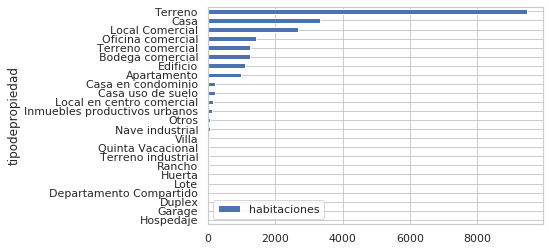

In [30]:
print('Cantidad valores nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'habitaciones':lambda x: x.isna().sum()}).sort_values(by='habitaciones', ascending=True).plot(kind='barh')

Porcentaje valores no nulos en cada propiedad


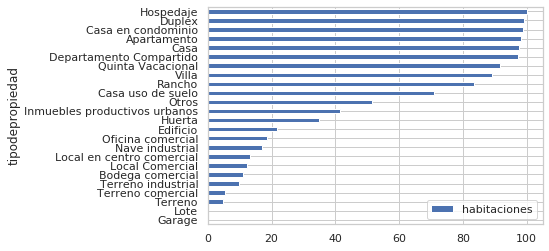

In [31]:
print('Porcentaje valores no nulos en cada propiedad')
features.groupby(['tipodepropiedad']).agg({'habitaciones':lambda x: x.count() / len(x) * 100}).sort_values(by='habitaciones', ascending=True).plot(kind='barh')

# Habitaciones, Baños, Garages y Antiguedad

In [32]:
print('Cantidad publicaciones Lote: ', len(features.loc[features.tipodepropiedad=='Lote','habitaciones']))
print('Datos Habitaciones: ', features.loc[features.tipodepropiedad=='Lote','habitaciones'].count())
print('Datos Baños: ', features.loc[features.tipodepropiedad=='Lote','banos'].count())
print('Datos Garages: ', features.loc[features.tipodepropiedad=='Lote','garages'].count())

Cantidad publicaciones Lote:  5
Datos Habitaciones:  0
Datos Baños:  0
Datos Garages:  1


In [33]:
print('Cantidad publicaciones Garage: ', len(features.loc[features.tipodepropiedad=='Garage','habitaciones']))
print('Datos Habitaciones: ', features.loc[features.tipodepropiedad=='Garage','habitaciones'].count())
print('Datos Baños: ', features.loc[features.tipodepropiedad=='Garage','banos'].count())
print('Datos Garages: ', features.loc[features.tipodepropiedad=='Garage','garages'].count())

Cantidad publicaciones Garage:  1
Datos Habitaciones:  0
Datos Baños:  0
Datos Garages:  1


In [34]:
print('Cantidad publicaciones Hospedaje: ', len(features.loc[features.tipodepropiedad=='Hospedaje','habitaciones']))
print('Datos Habitaciones: ', features.loc[features.tipodepropiedad=='Hospedaje','habitaciones'].count())
print('Datos Baños: ', features.loc[features.tipodepropiedad=='Hospedaje','banos'].count())
print('Datos Garages: ', features.loc[features.tipodepropiedad=='Hospedaje','garages'].count())

Cantidad publicaciones Hospedaje:  1
Datos Habitaciones:  1
Datos Baños:  0
Datos Garages:  1


In [35]:
features = features.loc[(features.tipodepropiedad!='Lote') & (features.tipodepropiedad!='Garage') & (features.tipodepropiedad!='Hospedaje'),:]

In [36]:
print('Cantidad publicaciones Lote: ', len(features.loc[features.tipodepropiedad=='Lote','habitaciones']))
print('Cantidad publicaciones Garage: ', len(features.loc[features.tipodepropiedad=='Garage','habitaciones']))

Cantidad publicaciones Lote:  0
Cantidad publicaciones Garage:  0


In [37]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [38]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [39]:
for tipo in features.tipodepropiedad.unique():
    features.loc[features.tipodepropiedad==tipo,['habitaciones','banos','garages','antiguedad']] = imputer.fit_transform(features.loc[features.tipodepropiedad==tipo,['habitaciones','banos','garages','antiguedad']])

### Set Test

In [40]:
df_test.tipodepropiedad.isna().sum()

7

In [41]:
df_test.loc[df_test.tipodepropiedad.isna(),['habitaciones','banos','garages']]

,habitaciones,banos,garages
13702,NaN,NaN,NaN
15832,NaN,NaN,NaN
26720,NaN,NaN,NaN
38993,3,2,NaN
46981,3,3,NaN
47296,3,4,2
50869,3,NaN,NaN


In [42]:
# Seteo manualmente casa, en base a informacion que se tiene (o no) de los datos de tipo nulo
df_test.loc[df_test.tipodepropiedad.isna(),'tipodepropiedad'] = 'Casa'

In [43]:
print('Cantidad publicaciones Terreno industrial: ', len(df_test.loc[df_test.tipodepropiedad=='Terreno industrial','habitaciones']))
print('Datos Habitaciones: ', df_test.loc[df_test.tipodepropiedad=='Terreno industrial','habitaciones'].count())
print('Datos Baños: ', df_test.loc[df_test.tipodepropiedad=='Terreno industrial','banos'].count())
print('Datos Garages: ', df_test.loc[df_test.tipodepropiedad=='Terreno industrial','garages'].count())

Cantidad publicaciones Terreno industrial:  6
Datos Habitaciones:  0
Datos Baños:  0
Datos Garages:  2


In [44]:
# En base a informacion que se tiene de Terreno y Terreno comercial completo
df_test.loc[df_test.tipodepropiedad=='Terreno industrial','habitaciones'] = 3
df_test.loc[df_test.tipodepropiedad=='Terreno industrial','banos'] = 1
df_test.loc[df_test.tipodepropiedad=='Terreno industrial','garages'] = 0

In [45]:
print('Cantidad publicaciones Lote: ', len(df_test.loc[df_test.tipodepropiedad=='Lote','habitaciones']))
print('Datos Habitaciones: ', df_test.loc[df_test.tipodepropiedad=='Lote','habitaciones'].count())
print('Datos Baños: ', df_test.loc[df_test.tipodepropiedad=='Lote','banos'].count())
print('Datos Garages: ', df_test.loc[df_test.tipodepropiedad=='Lote','garages'].count())

Cantidad publicaciones Lote:  1
Datos Habitaciones:  0
Datos Baños:  0
Datos Garages:  1


In [46]:
# Completo con 0 dado que no tengo informacion y las caracteristicas usuales de un lote
df_test.loc[df_test.tipodepropiedad=='Lote','habitaciones'] = 0
df_test.loc[df_test.tipodepropiedad=='Lote','banos'] = 0
df_test.loc[df_test.tipodepropiedad=='Lote','garages'] = 0

In [47]:
for tipo in df_test.tipodepropiedad.unique():
    df_test.loc[df_test.tipodepropiedad==tipo,['habitaciones','banos','garages','antiguedad']] = imputer.fit_transform(df_test.loc[df_test.tipodepropiedad==tipo,['habitaciones','banos','garages','antiguedad']])

# Provincia

In [48]:
Noroeste = ['Baja California Norte', 'Baja California Sur','Chihuahua', 'Durango', 'Sinaloa', 'Sonora']
Noreste = ['Coahuila','Nuevo León', 'Tamaulipas']
Oeste = ['Colima', 'Jalisco', 'Michoacán', 'Nayarit']
Este = ['Hidalgo', 'Puebla', 'Tlaxcala', 'Veracruz']
Centronorte = ['Aguascalientes', 'Guanajuato', 'Querétaro', 'San luis Potosí', 'Zacatecas']
Centrosur = ['Edo. de México', 'Distrito Federal', 'Morelos']
Suroeste = ['Chiapas', 'Guerrero', 'Oaxaca']
Sureste = ['Campeche', 'Quintana Roo', 'Tabasco', 'Yucatán']

In [49]:
def region(provincia):
    if(provincia in Noroeste):
        return 'Noroeste'
    if(provincia in Noreste):
        return 'Noreste'
    if(provincia in Oeste):
        return 'Oeste'
    if(provincia in Este):
        return 'Este'
    if(provincia in Centronorte):
        return 'Centronorte'
    if(provincia in Centrosur):
        return 'Centrosur'
    if(provincia in Suroeste):
        return 'Suroeste'
    if (provincia in Sureste):
        return 'Sureste'
    # provincia nula
    return random.choice(['Noroeste','Noreste','Oeste','Este','Centronorte','Centrosur','Suroeste','Sureste'])

In [50]:
print('Publicaciones sin provincia: ', features.provincia.isna().sum())
print('Publicaciones sin provincia ni ciudad ni idzona: ', len(features.loc[(features.provincia.isna() & features.ciudad.isna() & features.idzona.isna()),:]))

Publicaciones sin provincia:  153
Publicaciones sin provincia ni ciudad ni idzona:  153


In [51]:
# No tengo ningun dato para obtener provincia y cantidad es muy baja
features = features.dropna(subset=['provincia'])
features = features.reset_index(drop=True)

In [52]:
# One-hot regiones
features['region'] = features['provincia'].apply(region)
one_hot = pd.get_dummies(features.region)
features = features.merge(one_hot, right_index=True, left_index=True)

### Set Test

In [53]:
print('Publicaciones sin provincia: ', df_test.provincia.isna().sum())
print('Publicaciones sin provincia ni ciudad ni idzona: ', len(df_test.loc[(df_test.provincia.isna() & df_test.ciudad.isna() & df_test.idzona.isna()),:]))

Publicaciones sin provincia:  42
Publicaciones sin provincia ni ciudad ni idzona:  42


In [54]:
df_test['region'] = df_test['provincia'].apply(region)
print('Publicaciones sin region: ', df_test.region.isna().sum())

Publicaciones sin region:  0


In [55]:
one_hot_test = pd.get_dummies(df_test.region)
df_test = df_test.merge(one_hot_test, right_index=True, left_index=True)

#### Pruebas previas

# Tipo de propiedad

In [56]:
features_tipos = features.tipodepropiedad.value_counts().index
print(len(features_tipos))
features_tipos.sort_values()

21


Index(['Apartamento', 'Bodega comercial', 'Casa', 'Casa en condominio',
       'Casa uso de suelo', 'Departamento Compartido', 'Duplex', 'Edificio',
       'Huerta', 'Inmuebles productivos urbanos', 'Local Comercial',
       'Local en centro comercial', 'Nave industrial', 'Oficina comercial',
       'Otros', 'Quinta Vacacional', 'Rancho', 'Terreno', 'Terreno comercial',
       'Terreno industrial', 'Villa'],
      dtype='object')

In [57]:
one_hot = pd.get_dummies(features.tipodepropiedad)
features = features.merge(one_hot, right_index=True, left_index=True)

In [58]:
test_tipos = df_test.tipodepropiedad.value_counts().index
print(len(test_tipos))
test_tipos.sort_values()

22


Index(['Apartamento', 'Bodega comercial', 'Casa', 'Casa en condominio',
       'Casa uso de suelo', 'Departamento Compartido', 'Duplex', 'Edificio',
       'Huerta', 'Inmuebles productivos urbanos', 'Local Comercial',
       'Local en centro comercial', 'Lote', 'Nave industrial',
       'Oficina comercial', 'Otros', 'Quinta Vacacional', 'Rancho', 'Terreno',
       'Terreno comercial', 'Terreno industrial', 'Villa'],
      dtype='object')

In [59]:
one_hot_test = pd.get_dummies(df_test.tipodepropiedad)
df_test = df_test.merge(one_hot_test, right_index=True, left_index=True)

In [60]:
print(list(set(features.columns) - set(df_test.columns)))
print(list(set(df_test.columns) - set(features.columns)))

['precio']
['Lote']


In [61]:
df_test.Lote.value_counts()

0    59999
1        1
Name: Lote, dtype: int64

In [62]:
# Elimino columnas que no aparecen en los features (Solo una publicacion con Lote)
df_test = df_test.drop('Lote',axis=1)

# Dolar

In [63]:
df_dollar = pd.read_csv(path + 'dollar.csv')
df_dollar = df_dollar.dropna()
df_dollar['Cierre'] = pd.to_numeric(df_dollar['Cierre'])
df_dollar['Cierre'] = df_dollar['Cierre'].round(3)
df_dollar['Fecha'] = pd.to_datetime(df_dollar['Fecha'], format='%d.%m.%Y')
df_dollar = df_dollar.set_index('Fecha')
df_dollar = df_dollar.loc[:, 'Cierre'].to_frame()

In [64]:
# Agrego fechas faltantes (Sabados y Domingos) con valor 0
idx = pd.date_range(start='2011-12-12', end='2017-01-31')
df_dollar = df_dollar.reindex(idx, fill_value=0)

In [65]:
# Cuando se trata de una fecha que corresponde a un Sabado o Domingo no se tiene infromación sobre Cierre
# Le asigno el valor correspondiente al Viernes previo
for i in range(0, len(df_dollar)):
    if (df_dollar.iloc[i]['Cierre'] == 0):
        df_dollar.iloc[i]['Cierre'] = df_dollar.iloc[i-1]['Cierre']

In [66]:
features['fecha'] = features['fecha'].apply(lambda x: x.replace(hour=0, minute=0, second=0)) # Seteo tiempo a 00:00:00 para join
features = features.set_index('fecha')
features = features.join(df_dollar, how='left')
features = features.reset_index()
features.rename(columns = {'index' : 'fecha'}, inplace=True)

In [67]:
features.rename(columns = {'Cierre' : 'Valor dolar'}, inplace=True)

### Set test

In [68]:
df_test['fecha'] = df_test['fecha'].apply(lambda x: x.replace(hour=0, minute=0, second=0)) # Seteo tiempo a 00:00:00 para join
df_test = df_test.set_index('fecha')
df_test = df_test.join(df_dollar, how='left')
df_test = df_test.reset_index()
df_test.rename(columns = {'index' : 'fecha'}, inplace=True)
df_test.rename(columns = {'Cierre' : 'Valor dolar'}, inplace=True)

# Valor metro cuadrado (Tipo)

In [69]:
print('Publicaciones sin tipo: ', features.tipodepropiedad.isna().sum())

Publicaciones sin tipo:  0


In [70]:
features['valor m2 tipodepropiedad'] = (features.precio * features['Valor dolar']) / features.metrostotales
valueXType = features.groupby('tipodepropiedad').agg({'valor m2 tipodepropiedad':'mean'})

In [71]:
def getM2Tipo(row):
    if (not pd.isnull(row.tipodepropiedad) and row.tipodepropiedad in valueXType.index):
        return valueXType.loc[row.tipodepropiedad,'valor m2 tipodepropiedad']
    return valueXType['valor m2 tipodepropiedad'].median()

In [72]:
features['valor m2 tipodepropiedad'] = features.apply(lambda row: getM2Tipo(row), axis=1)

### Set Test

In [73]:
print('Publicaciones sin tipodepropiedad: ', df_test.tipodepropiedad.isna().sum())

Publicaciones sin tipodepropiedad:  0


In [74]:
df_test['valor m2 tipodepropiedad'] = df_test.apply(lambda row: getM2Tipo(row), axis=1)

In [75]:
df_test['valor m2 tipodepropiedad'].count()

60000

# Valor metro cuadrado (Ciudad)

In [76]:
print('Publicaciones sin ciudad: ', features.ciudad.isna().sum())
print('Publicaciones sin idzona: ', features.idzona.isna().sum())
print('Publicaciones sin ciudad ni idzona: ', len(features.loc[features.ciudad.isna() & features.idzona.isna(),:]))
print('Cantidad ciudades: ', len(features.ciudad.unique()))
print('Cantidad idzzonas: ', len(features.idzona.unique()))

Publicaciones sin ciudad:  201
Publicaciones sin idzona:  28423
Publicaciones sin ciudad ni idzona:  201
Cantidad ciudades:  876
Cantidad idzzonas:  19719


Descarto aquellas publicaciones sin ciudad (tan solo 201) ya que tampoco voy a poder obtener valor de idzona

In [77]:
features = features.dropna(subset=['ciudad'])
print('Publicaciones sin ciudad: ', features.ciudad.isna().sum())
print('Publicaciones sin idzona: ', features.idzona.isna().sum())

Publicaciones sin ciudad:  0
Publicaciones sin idzona:  28222


In [78]:
print('Media de idzona por ciduad: ', features.groupby('ciudad').agg({'idzona':lambda x: len(x.unique())}).idzona.median())
print('Promedio de idzona por ciduad: ', features.groupby('ciudad').agg({'idzona':lambda x: len(x.unique())}).idzona.mean())
print('Maximo de idzona por ciudad: ', features.groupby('ciudad').agg({'idzona':lambda x: len(x.unique())}).idzona.max())
print('Minimo de idzona por ciudad: ', features.groupby('ciudad').agg({'idzona':lambda x: len(x.unique())}).idzona.min())

Media de idzona por ciduad:  3.0
Promedio de idzona por ciduad:  23.097142857142856
Maximo de idzona por ciudad:  656
Minimo de idzona por ciudad:  1


In [79]:
# DF con cantidad de veces que se repite la cantiad de idzonas por ciudad
print(features.groupby('ciudad').agg({'idzona':lambda x: len(x.unique())}).groupby('idzona').size().to_frame().sum())
features.groupby('ciudad').agg({'idzona':lambda x: len(x.unique())}).groupby('idzona').size().to_frame().T

0    875
dtype: int64


idzona,1,2,3,4,5,6,7,8,9,10,...,325,333,339,403,406,423,481,520,539,656
0,305,114,81,48,35,26,19,18,11,7,...,1,1,1,1,1,1,1,1,1,1


Dado que es muy baja la cantidad de ciudades con un solo idzona y hay gran cantidad de datos nulos de idzona se decide calcular el valor del metro cuadrado por ciudad (EN DOLARES)

In [80]:
features = features.reset_index(drop=True)

In [81]:
features['valor m2 ciudad'] = (features.precio * features['Valor dolar']) / features.metrostotales
valueXCity = features.groupby('ciudad').agg({'valor m2 ciudad':'mean'})

In [82]:
def getM2(row):
    if (not pd.isnull(row.ciudad) and row.ciudad in valueXCity.index):
        return valueXCity.loc[row.ciudad,'valor m2 ciudad']
    return valueXCity['valor m2 ciudad'].median()

In [83]:
features['valor m2 ciudad'] = features.apply(lambda row: getM2(row), axis=1)

### Set Test

In [84]:
print('Publicaciones sin provincia: ', df_test.provincia.isna().sum())
print('Publicaciones sin ciudad: ', df_test.ciudad.isna().sum())
print('Publicaciones sin idzona: ', df_test.idzona.isna().sum())
print('Publicaciones sin ciudad ni idzona: ', len(df_test.loc[df_test.ciudad.isna() & df_test.idzona.isna(),:]))
print('Publicaciones sin ciudad ni provincia: ', len(df_test.loc[df_test.ciudad.isna() & df_test.provincia.isna(),:]))
print('Publicaciones sin ciudad ni idzona ni provincia: ', len(df_test.loc[df_test.ciudad.isna() & df_test.idzona.isna() & df_test.provincia.isna(),:]))
print('Cantidad ciudades: ', len(df_test.ciudad.unique()))
print('Cantidad idzonas: ', len(df_test.idzona.unique()))

Publicaciones sin provincia:  42
Publicaciones sin ciudad:  83
Publicaciones sin idzona:  7179
Publicaciones sin ciudad ni idzona:  83
Publicaciones sin ciudad ni provincia:  42
Publicaciones sin ciudad ni idzona ni provincia:  42
Cantidad ciudades:  577
Cantidad idzonas:  11234


In [85]:
df_test['valor m2 ciudad'] = df_test.apply(lambda row: getM2(row), axis=1)

In [86]:
df_test['valor m2 ciudad'].count()

60000

# Terminos de Publicaciones mas caras

In [87]:
print('Precio maximo: ', features.precio.max())
print('Precio minimo: ', features.precio.min())
print('Precio median: ', features.precio.median())
print('Precio prmdio: ', features.precio.mean())
print('Publicaciones con precio mayor a promedio: ', len(features.loc[features.precio > features.precio.mean(),:]))
print('Publicaciones con precio menor o igual a promedio: ', len(features.loc[features.precio <= features.precio.mean(),:]))

Precio maximo:  12525000.0
Precio minimo:  310000.0
Precio median:  1850000.0
Precio prmdio:  2530667.2
Publicaciones con precio mayor a promedio:  88116
Publicaciones con precio menor o igual a promedio:  151477


# Features a CSV

In [88]:
cols_dropped = ['lat', 'lng', 'id', 'idzona', 'tot-cub','region','provincia', 'tipodepropiedad']
cols_string = ['titulo', 'descripcion','direccion', 'ciudad','fecha']
features_to_export = features.drop(cols_dropped + cols_string, axis=1)

In [89]:
cols_dropped = ['lat', 'lng', 'idzona', 'tot-cub','region','provincia', 'tipodepropiedad']
test_to_export = df_test.drop(cols_dropped + cols_string, axis=1)

In [90]:
test_to_export.count()

id                               60000
antiguedad                       60000
habitaciones                     60000
garages                          60000
banos                            60000
metroscubiertos                  60000
metrostotales                    60000
gimnasio                         60000
usosmultiples                    60000
piscina                          60000
escuelascercanas                 60000
centroscomercialescercanos       60000
anio                             60000
mes                              60000
Centronorte                      60000
Centrosur                        60000
Este                             60000
Noreste                          60000
Noroeste                         60000
Oeste                            60000
Sureste                          60000
Suroeste                         60000
Apartamento                      60000
Bodega comercial                 60000
Casa                             60000
Casa en condominio       

In [91]:
features_to_export.to_csv('data/features.csv', index=False)
test_to_export.to_csv('data/testModified.csv', index=False)